In [1]:
# MULTIPLE LINEAR REGRESSION
#Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
# 2. Load dataset (local file)
data = pd.read_csv("laptop.csv")
print("Dataset loaded successfully\n")
print(data.head())
print("\nDataset Info:\n")
print(data.info())

Dataset loaded successfully

   Unnamed: 0                                     model_name   brand  \
0           0            Lenovo V15 ITL G2 82KBA033IH Laptop  Lenovo   
1           1          HP Pavilion 15-ec2004AX Gaming Laptop      HP   
2           2                   Lenovo V15 82KBA03HIH Laptop  Lenovo   
3           3  Asus Vivobook 16X 2022 M1603QA-MB502WS Laptop    Asus   
4           4                         HP 15s-fr4000TU Laptop      HP   

      processor_name  ram(GB)  ssd(GB)  Hard Disk(GB) Operating System  \
0   11th Gen Core i3        8      512              0          Windows   
1  AMD Ryzen 5 5600H        8      512              0          Windows   
2   11th Gen Core i3        8      256           1000          Windows   
3      Ryzen 5-5600H        8      512              0          Windows   
4   11th Gen Core i5        8      512              0          Windows   

                       graphics  screen_size(inches) resolution (pixels)  \
0          Intel 

In [4]:
#Handle missing values (if any)
data = data.dropna()

In [6]:
#Encode categorical columns
label_encoder = LabelEncoder()
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = label_encoder.fit_transform(data[column])

In [8]:
#Separate features (X) and target (y)
X = data.drop("price", axis=1)
y = data["price"]

In [9]:
#Feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [10]:
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [11]:
#Create and train Multiple Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [12]:
#Make predictions
y_pred = model.predict(X_test)

In [14]:
#Model evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("\nModel Evaluation Metrics:")
print("MAE  :", mae)
print("MSE  :", mse)
print("RMSE :", rmse)
print("R2   :", r2)


Model Evaluation Metrics:
MAE  : 18254.85923182842
MSE  : 689197358.3761575
RMSE : 26252.56860530332
R2   : 0.7572637810208871


In [16]:
#Compare actual vs predicted values
comparison = pd.DataFrame({
    "Actual Price": y_test,
    "Predicted Price": y_pred
})
print("\nActual vs Predicted Values:\n")
print(comparison.head())


Actual vs Predicted Values:

     Actual Price  Predicted Price
632        187990    160323.931100
635         29990     16294.034660
687        100990    145445.604546
516        211990    134076.503691
528         59990     68437.610535


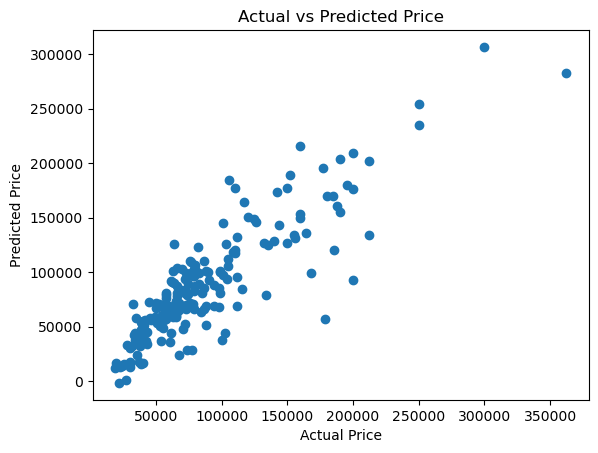

In [17]:
#Visualization: Actual vs Predicted
plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.show()